# COGS 108 - Thanks for the bits

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

The goal of our project is to view and determine trends between how much rated content a game has and its popularity. As a baseline, we decided to use Twitch stream and viewership data on a per-game basis as the metric to measure the popularity of a game, as the more popular a game is the more people will want to view it on Twitch. Game content will be determined by ESRB rating that sets categorical content filters when determining what rating a game gets. We would also like to view if this relationship is also altered during the transition periods before COVID-19 and after. Our limit for that would be marked as March 2020

# Names

- Gabriel Aganon
- Ramy Al-Hosri
- Sean Ng
- Jan Do
- Hwi Yeo

<a id='research_question'></a>
# Research Question

How is the amount of content in a video game (as dictated by the ESRB) predictive of its popularity on Twitch before and during the COVID-19 pandemic?

<a id='background'></a>

## Background & Prior Work

<p>Across the globe, governments employ ways of moderating the content contained in various media including video games. In the case of the United States of America (or US), the way for moderating video game content is done through the “ESRB (Entertainment Software Rating Board” who “focuses on...protecting younger children from violent and sexual content” through a rating system (Dogruel & Joeckel, 2013, p. 673 & p. 687). While we do not intend on exploring the reasons behind the US’ method for moderating video games, we intend on figuring out if this has the ability to predict a certain thing: the popularity of various video games. Of course, when discussing popularity, there are various ways in which we could approach such a concept. Ultimately, we have decided to approach popularity in terms of viewership within the popular streaming platform Twitch.<p>

<p>For the unfamiliar, Twitch is a website in which various people broadcast their gameplay of various video games in front of live online audiences. Hamilton, Garretson, and Kerne (2014) assert that this phenomenon is partially influenced by “viewers” (the live audiences mentioned above) “want[ing] to learn something about a particular game”, thus putting pressure on “streamers” (the people broadcasting their gameplay) to provide “a sense of friendliness” (p. 1319). In a way, this returns to the importance of moderating video game content. The insight that streamers must maintain some sort of rapport with their respective audiences further supports our endeavor of figuring out whether the video game content dictated by one of the major moderation systems in the world can be a tool for predicting a video game’s popularity. After all, if a moderation system like the ESRB already presents standards for what a video game contains, that limits the content that: 1) a streamer can present to various audiences; 2) a viewer can connect with.<p>

<p>However, complicating matters is the fact that at the time of this project, there is also an ongoing global pandemic. Singh and Singh (2020) contend that since “March 2020”, the phenomenon of “staying away from people to avoid the spreading and catching [of COVID-19]” has become commonplace across the globe as evidenced by “unprecedented lockdowns” (pp. 168-169, p. 171). In other words, people are more likely to be at home currently than before the date presented by Singh and Singh. While this may certainly present detrimental effects, we believe that it also presents an opportunity. Given that more people are staying at home, this may showcase a trend of more people generally viewing content through online sources. Of course, this can include Twitch! Therefore, we would also like to examine if the relationship between video game moderation and video game popularity (with the prior being a potential predictor of the latter) holds up before and after the onset of the ongoing pandemic.<p>

References <br>
1. Dogruel, L. & Joeckel, S. (2013). Video game rating systems in the US and Europe: Comparing their outcomes. The International Communication Gazette, 75(7), 672 - 692. https://doi.org/10.1177/1748048513482539. <br>
2. Hamilton, W.A., Garretson, O., & Kerne, A. (2014). Streaming on Twitch: Fostering Participatory Communities of Play within Live Mixed Media. CHI '14: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 1315 - 1324). Association for Computing Machinery. https://doi.org/10.1145/2556288.2557048. <br>
3. Singh, J. & Singh, J. (2020). COVID-19 and Its Impact on Society. Electronic Research Journal of Social Sciences and Humanities, 2(1), 168 - 172. http://www.eresearchjournal.com/volume-2-issue-i-jan-march-2020/.

# Hypothesis


The ESRB counts the total number of content types presented in a game (i.e. blood, crude humor, alcohol reference, etc), so a higher amount of content most likely indicates a linear relationship with the game’s popularity on Twitch. Since games meant for mature audiences have a higher amount of content types compared to child-friendly games, we suspect that games with more content (indicated by our column of “num_content”) are more popular than games with lower content. Comparing the Twitch dataset to before and during the pandemic, we also predict that games with more content are most likely to rise in popularity because more people are quarantined. The influx of people staying at home can suggest that more games are being played, so higher content games are most likely to be the most popular.

Note: In this context, num_content will be referring to each game and it's ratings. The ESRB has a checklist of criteria (sexual content, blood, language, etc.) and checks if those criteria are included in a game, and then gives a game rating based on how many different bins of criteria the game contains. This summing of the different criteria is what we refer to as num_content

# Dataset(s)

- Dataset Name: Top Games on Twitch 2016-2021
- Link to the dataset:https://www.kaggle.com/rankirsh/evolution-of-top-games-on-twitch?select=Twitch_game_data.csv
- Number of observations: 13,800

This dataset contains the most popular games on Twitch from 2016 to 2021. It includes related statistics such as peak viewers, average viewers, etc.

- Dataset Name: Video Games Rating By 'ESRB'
- Link to the dataset: https://www.kaggle.com/imohtn/video-games-rating-by-esrb
- Number of observations: 1895

This dataset includes popular games, their ESRB ratings, and a binary set of what kind of content is in the game. :)


We plan on combining the data by finding overlapping game titles between the 2 and merging based on that. 

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = (30,15)
import patsy
import statsmodels.api as sm

In [2]:
# import Twitch Dataset
URL = 'https://raw.githubusercontent.com/ngseann/twitch-data/main/Twitch_game_data.csv'
twitch = pd.read_csv(URL)
twitch

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
13795,196,DEVOUR,9,2021,723182,29526 hours,56083,345,11026,1005,41,24.49
13796,197,War Thunder,9,2021,723003,75333 hours,8659,225,6892,1005,104,9.60
13797,198,Lost in Random,9,2021,720893,12763 hours,53975,107,1649,1002,17,56.48
13798,199,Garry's Mod,9,2021,712712,17637 hours,88018,80,3711,991,24,40.41


In [3]:
# import ESRB Dataset
URL2 = 'https://raw.githubusercontent.com/ngseann/twitch-data/main/Video_games_esrb_rating.csv'
esrb = pd.read_csv(URL2)
esrb

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


# Data Cleaning

Following criticisms of the first checkpoint, we decided to further clean our data. Initially, we removed any rows with empty columns. After that, we then chose a column to merge the 2 datasets, which contains the titles of various video games. Then, we standardized the names of such to include as many as we can upon merging the datasets.

With those intial steps done, we created 2 new columns. The 1st new column contains the sum of the binary values from the esrb dataset's columns. We term this column "num_content" and further explain what it means in the context of our project down below.

The 2nd new column contains strings. Such strings are combinations of values from the Year and Month columns. As such, it is not coincidence that the name of the column is "month-year". For example, one value from this column would be "01-2020". Given that we are examining a specific period in time, this column contains the "month-year" in which data is collected from January 2019 to September 2021.

Beyond the steps outlined above, the rest of our cleaning is nothing special. We simply removed columns that we deem irrelevant to our project. Moreover, we sorted columns according to time (the columns "Year" and "Month").

In [4]:
twitch.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [5]:
twitch_null = twitch[twitch.isnull().any(axis = 1)]
twitch_null

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7561,162,NaN,2,2019,317951,77004 hours,30919,5804,21758,473,114,4.13


In [6]:
twitch.shape

(13800, 12)

In [7]:
twitch = twitch.dropna(subset = ['Game'])

In [8]:
twitch.shape

(13799, 12)

In [9]:
esrb.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [10]:
esrb.shape

(1895, 34)

In [11]:
# matching the name of the column for which we are gonna merge the datasets
esrb = esrb.rename(columns={'title':'Game'})

In [12]:
# creating a function for standardizing game names
def standardize_game(string):
    string = string.lower()
    string = string.strip()
    
    # removing intellectual property symbols
    if '™' in string: 
        string = string.replace('™', '')
    elif '®' in string:
        string = string.replace('®', '')
    elif '©' in string:
        string = string.replace('©', '')
    
    # strip again
    string.strip()
    
    return string

In [13]:
# standardizing Game columns of twitch and esrb datasets
twitch['Game'] = twitch['Game'].astype(str).apply(standardize_game)
esrb['Game'] = esrb['Game'].astype(str).apply(standardize_game)

C:\Users\Ramy\AppData\Local\Temp/ipykernel_65328/4056705493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitch['Game'] = twitch['Game'].astype(str).apply(standardize_game)


In [14]:
# merge the 2 datasets through the Game column
bigData = twitch.merge(esrb)
# we also picked the years of interest, which are from 2019 to 2021
bigData = bigData.loc[(bigData['Year'] >= 2019) & (bigData['Year'] <= 2021)]

In [15]:
# we add a column num_content, which contains the sums of the ESRB columns
esrb_columns_to_add = bigData.iloc[:, 13:].sum(axis = 1)
bigData = bigData.assign(sum = esrb_columns_to_add)
bigData = bigData.rename(columns = {'sum':'num_content'})
bigData = bigData.reset_index()

C:\Users\Ramy\AppData\Local\Temp/ipykernel_65328/2439878226.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  esrb_columns_to_add = bigData.iloc[:, 13:].sum(axis = 1)


The column "num_content" (a shorthand for number of content) takes the sum of the preceding columns that are derived from the ESRB dataset. In other words, it adds up how much content that a game contains that the ESRB deems as important to that game's identity (and thus why it would end up being rated E, T, M, etc). "num_content" is what we are referring to when we say "amount of content (dictated by the ESRB) in a video game".

In [16]:
# keeping Game, Month, Year, Avg_viewers, and everything after console
bigData = bigData.drop(['index', 'Rank', 'Hours_watched',
       'Hours_Streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 
        'Avg_channels', 'Avg_viewer_ratio', 'console'], axis = 1)
# the columns above are irrelevant to what we are doing

In [17]:
# putting data from month and year column into a single column month-year
# this columns exists so that doing line plots will not be difficult
bigData['month-year'] = bigData['Month'].astype('str') + '-' + bigData['Year'].astype('str')

In [18]:
# sorting the data by the two columns we made: month-year and num_content
bigData = bigData.sort_values(by = ['Year', 'Month'], ascending = True).reset_index(drop = True)

In [19]:
# show final table for our main dataset labeled bigData
bigData

,Game,Month,Year,Avg_viewers,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,...,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,num_content,month-year
0,minecraft,1,2019,14573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,1,1-2019
1,world of tanks,1,2019,5343,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,1,1-2019
2,grand theft auto v,1,2019,16343,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,1-2019
3,darkest dungeon,1,2019,1900,1,0,0,0,1,0,...,0,0,0,1,0,0,0,T,5,1-2019
4,dayz,1,2019,2096,0,0,1,0,0,0,...,0,1,0,0,0,0,0,M,2,1-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,pga tour 2k21,9,2021,1066,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,9-2021
1421,nba 2k21,9,2021,1389,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,9-2021
1422,fifa 21,9,2021,7014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,9-2021
1423,call of duty: black ops cold war,9,2021,3646,0,0,0,1,0,0,...,0,1,0,1,0,0,0,M,5,9-2021


In [20]:
bigData.shape

(1425, 38)

# Data Analysis & Results

Our EDA (and various analyses) are split into 4 sections. The first section delves into the video games and what we can infer about such. Afterwards, the following section checks whether the dependent variable of interest (Twitch viewership) is normally disributed or not. When the distribution is determined to be normal, the 3rd section analyzes num_content and Twitch viewership as a linear relationship, utilizing regression as a means for testing whether num_content has predictive power over Twitch viewership. Finally, after doing such, we examine if this predictive power holds true from January 2019 to September 2021 by examining trends of Twitch viewership divided according to num_content.

# 1: What games are we dealing with?

In [21]:
# count of games per num_content
# group by game name and num_content to get unique games and their num_content
game_by_content = bigData.groupby(['Game','num_content']).count().reset_index()
# group by num_content to get count of unique games per num_content
game_by_content.groupby('num_content')['Game'].count()

num_content
1    55
2    45
3    42
4    28
5    24
6     2
Name: Game, dtype: int64

In [22]:
# count of games per esrb_rating
# group by game name and num content to get unique games and their num_content
game_by_esrb = bigData.groupby(['Game','esrb_rating']).count().reset_index()
# group by num_content to get count of unique games per num_content
game_by_esrb.groupby('esrb_rating')['Game'].count()

esrb_rating
E     27
ET    30
M     85
T     54
Name: Game, dtype: int64

In total, we are dealing with 196 games. With num_content <= 5, we have a reasonable amount of games. However, with num_content = 6, we only have 2 games.

In [23]:
# below are the outlier games in which num_content = 6
game_by_content[game_by_content['num_content'] == 6].reset_index(drop = True).iloc[:, :2]

,Game,num_content
0,danganronpa v3: killing harmony,6
1,grand theft auto v,6


In [24]:
bigData[bigData['Game'] == 'danganronpa v3: killing harmony']

,Game,Month,Year,Avg_viewers,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,...,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,num_content,month-year
857,danganronpa v3: killing harmony,7,2020,1210,0,0,1,0,0,0,...,1,1,1,0,0,0,0,M,6,7-2020


In [25]:
bigData[bigData['Game'] == 'grand theft auto v']

,Game,Month,Year,Avg_viewers,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,...,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,num_content,month-year
2,grand theft auto v,1,2019,16343,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,1-2019
43,grand theft auto v,2,2019,19100,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,2-2019
91,grand theft auto v,3,2019,82794,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,3-2019
138,grand theft auto v,4,2019,115515,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,4-2019
184,grand theft auto v,5,2019,100570,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,5-2019
233,grand theft auto v,6,2019,83216,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,6-2019
279,grand theft auto v,7,2019,84409,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,7-2019
328,grand theft auto v,8,2019,87103,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,8-2019
380,grand theft auto v,9,2019,54922,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,9-2019
433,grand theft auto v,10,2019,49646,0,0,0,1,0,0,...,0,1,0,0,1,0,0,M,6,10-2019


Of the 2 games in which num_content = 6, there really only 1 game that appears from 2019 to 2021: grand theft auto v. By contrast, danganronpa v3 only appears once in 2020. Additionally, both games are rated M. However, does having a high num_content necessarily mean that a game is rated M?

In [26]:
bigData[bigData['num_content'] == 1].reset_index(drop = True)

,Game,Month,Year,Avg_viewers,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,...,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,num_content,month-year
0,minecraft,1,2019,14573,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ET,1,1-2019
1,world of tanks,1,2019,5343,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,1,1-2019
2,rocket league,1,2019,5003,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,1-2019
3,playerunknown's battlegrounds,1,2019,40177,0,0,1,0,0,0,...,0,0,0,0,0,0,0,T,1,1-2019
4,fortnite,1,2019,170259,0,0,0,0,0,0,...,0,0,0,0,0,0,1,T,1,1-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,apex legends,9,2021,95537,0,0,1,0,0,0,...,0,0,0,0,0,0,0,T,1,9-2021
521,sekiro: shadows die twice,9,2021,1397,0,0,0,1,0,0,...,0,0,0,0,0,0,0,M,1,9-2021
522,pga tour 2k21,9,2021,1066,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,9-2021
523,nba 2k21,9,2021,1389,0,0,0,0,0,0,...,0,0,0,0,0,0,0,E,1,9-2021


By looking at games with num_content = 1, we see that not all are rated the same. For examples, apex legends is rated T while a game like rocket league is rated E. This implies that esrb rating is not based on how many identifiable elements are in a game, but on what those identifiable elements are. Our analysis should consider this finding. 

# 2: What is the distribution of viewership within our dataset?

<AxesSubplot:xlabel='Avg_viewers', ylabel='Count'>

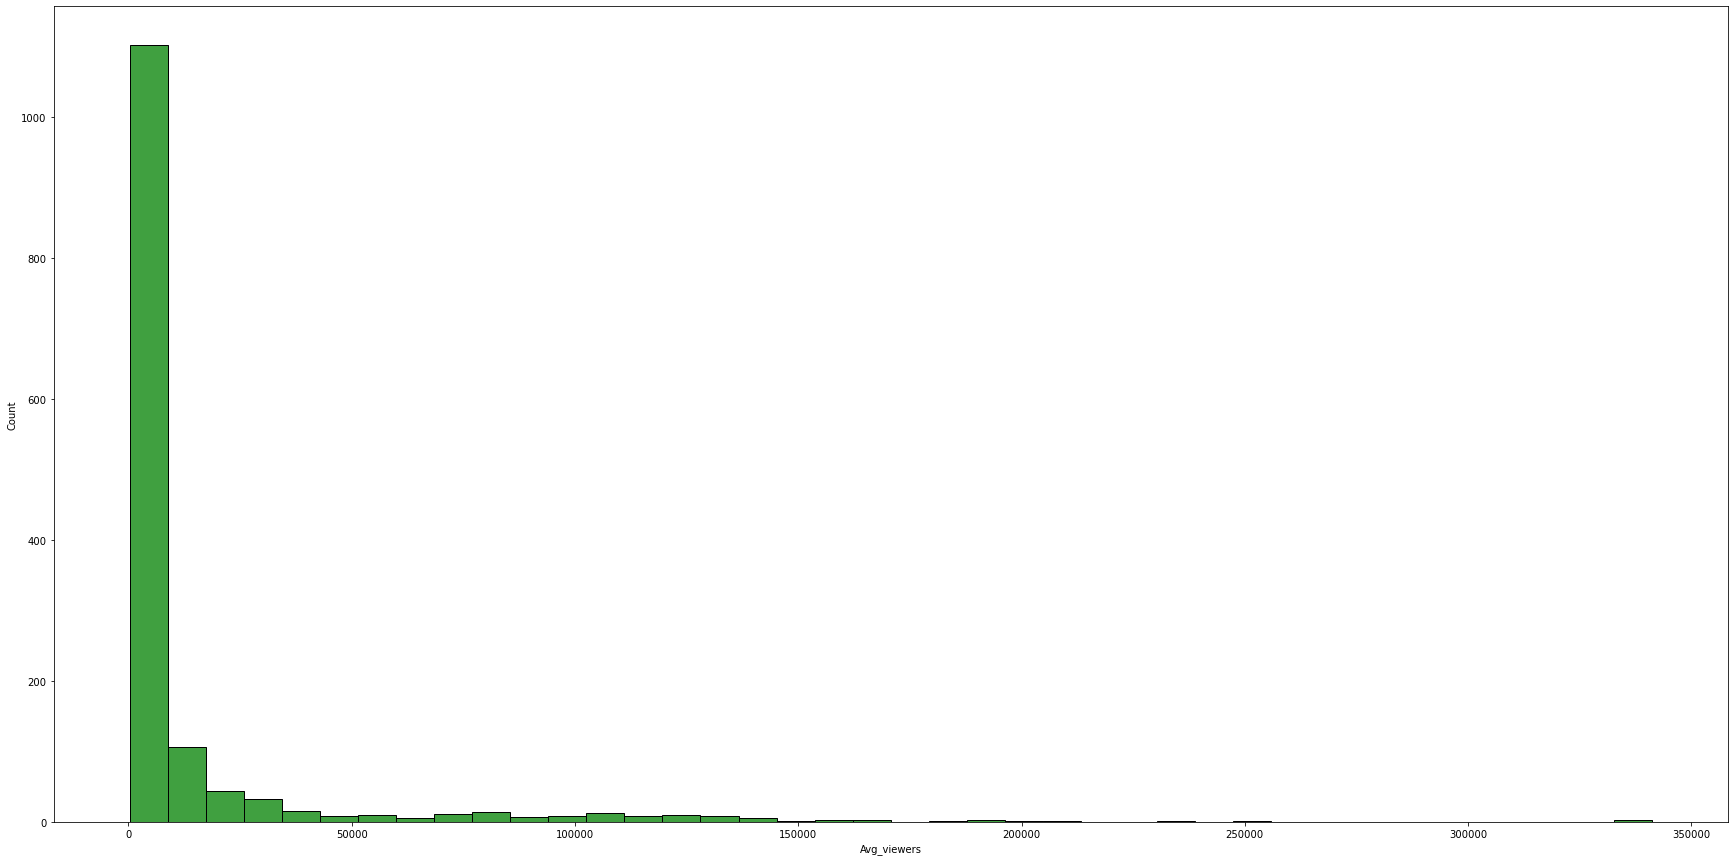

In [27]:
#
sns.histplot(bigData['Avg_viewers'], bins = 40, color = 'g')

Overall, Twitch viewership of the games within our dataset (measured in terms of average viewers or "Avg_viewers") is not normally distributed in our dataset. This implies that while there are certainly outliers, the majority of games are not necessarily viewed frequently by people on Twitch. As such, the distribution above is right-skewed, implying that we must perform a logarithmic transformation with our data, which we do below.

In [28]:
# applying a logarithm over Avg_viewers with an offset of 0.1
bigData['viewers_log10'] = np.log10(bigData['Avg_viewers'] + 0.1)
bigData

,Game,Month,Year,Avg_viewers,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,...,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,num_content,month-year,viewers_log10
0,minecraft,1,2019,14573,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,1,1-2019,4.163552
1,world of tanks,1,2019,5343,0,0,0,0,0,0,...,0,0,0,0,0,0,T,1,1-2019,3.727793
2,grand theft auto v,1,2019,16343,0,0,0,1,0,0,...,1,0,0,1,0,0,M,6,1-2019,4.213334
3,darkest dungeon,1,2019,1900,1,0,0,0,1,0,...,0,0,1,0,0,0,T,5,1-2019,3.278776
4,dayz,1,2019,2096,0,0,1,0,0,0,...,1,0,0,0,0,0,M,2,1-2019,3.321412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,pga tour 2k21,9,2021,1066,0,0,0,0,0,0,...,0,0,0,0,0,0,E,1,9-2021,3.027798
1421,nba 2k21,9,2021,1389,0,0,0,0,0,0,...,0,0,0,0,0,0,E,1,9-2021,3.142734
1422,fifa 21,9,2021,7014,0,0,0,0,0,0,...,0,0,0,0,0,0,E,1,9-2021,3.845972
1423,call of duty: black ops cold war,9,2021,3646,0,0,0,1,0,0,...,1,0,1,0,0,0,M,5,9-2021,3.561829


<AxesSubplot:xlabel='viewers_log10', ylabel='Count'>

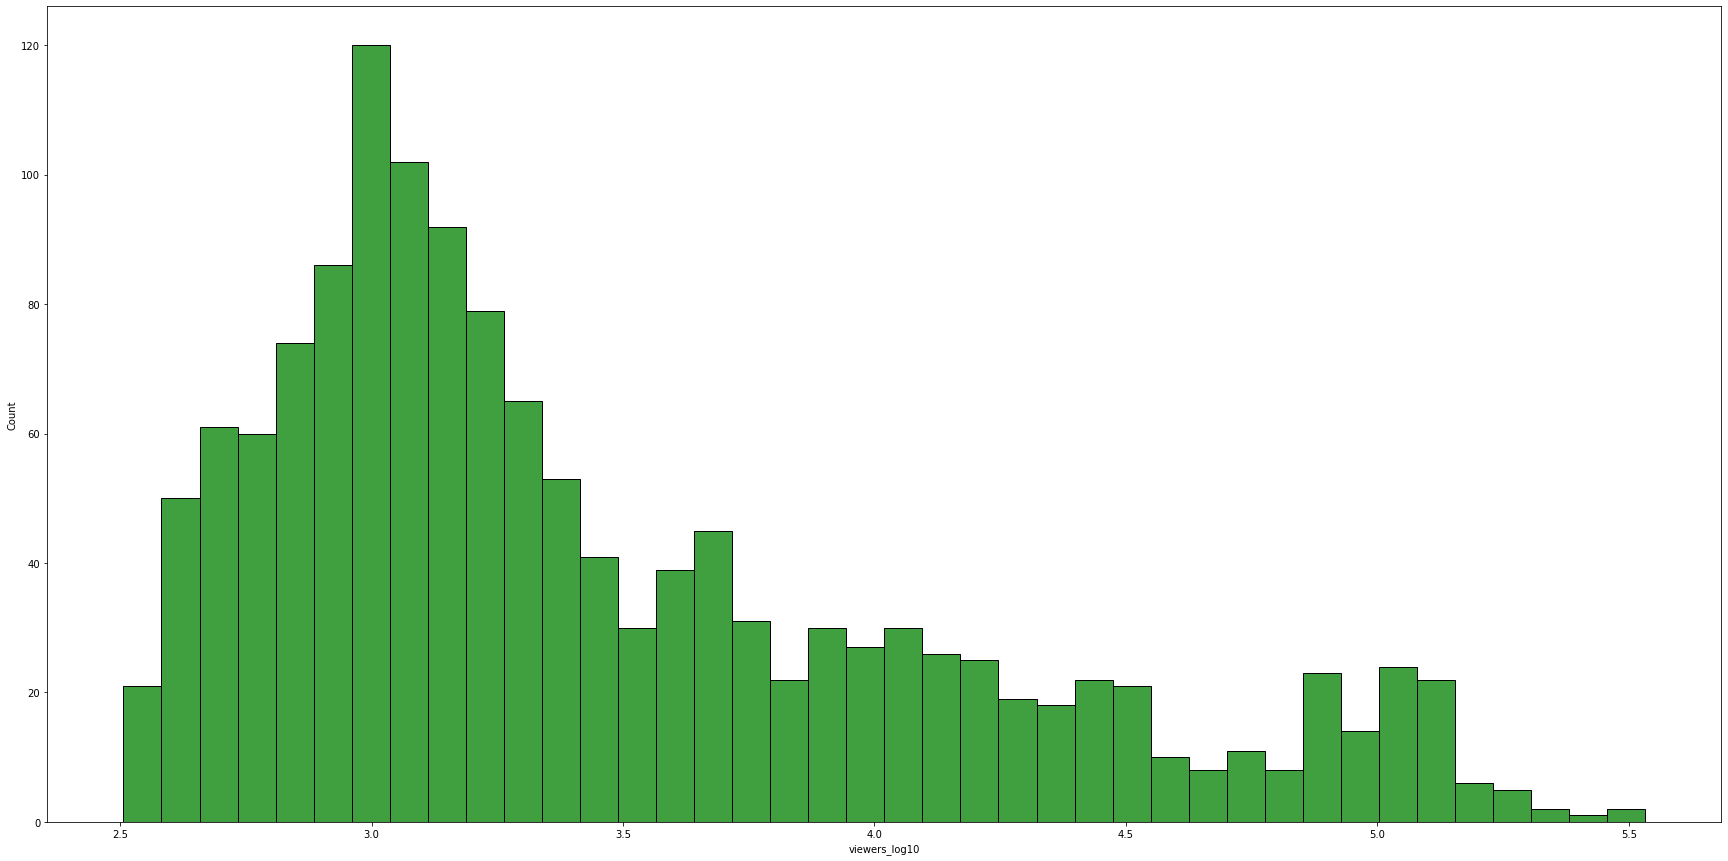

In [29]:
# checking if viewers_log10 becomes a normal distribution when plotted, which it does
# however, there are outliers to the right
sns.histplot(bigData['viewers_log10'], bins = 40, color = 'g')

# 3: Linear Regression

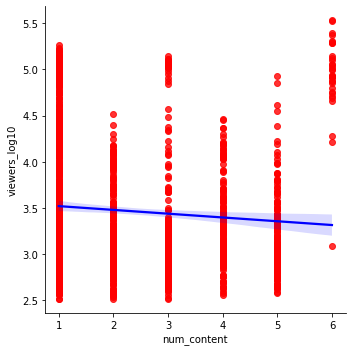

In [30]:
sns.lmplot (
    x = 'num_content',
    y = 'viewers_log10',
    data = bigData,
    fit_reg = True,
    scatter_kws = {'color' : 'red'},
    line_kws = {'color' : 'blue'}
)

In [31]:
outcome, predictors = patsy.dmatrices('viewers_log10 ~ num_content', bigData)

mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:          viewers_log10   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.35
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000776
Time:                        16:44:12   Log-Likelihood:                -1475.1
No. Observations:                1425   AIC:                             2954.
Df Residuals:                    1423   BIC:                             2965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5595      0.035    101.443      

Performing a linear regression with our independent variable being num_content and viewers_log10 (the Twitch viewership of our dataset that we performed a logarithmic transformation upon), we end with an effect size of -0.0410 (because Twitch viewership was logarithmically transformed, this is even lower). Based on our confidence interval (ranging from -0.065 and -0.017) and p = 0.025, we conclude that there is an inverse relationship between num_content and Twitch viewership: as num_content increases, Twtich viewership (and thus popularity) decreases. This runs counter to what we expected in which we expected a direct relationship. However, does this hold up before and during the COVID-19 pandemic? 

## Comparing before and after Covid

We mark March 2020 as the start of the COVID era, so anything before 2020 is the before and anything from January 2020 on is the after

In [32]:
before = bigData[bigData['Year'] <= 2019]
after = bigData[bigData['Year'] > 2019]

## Before COVID

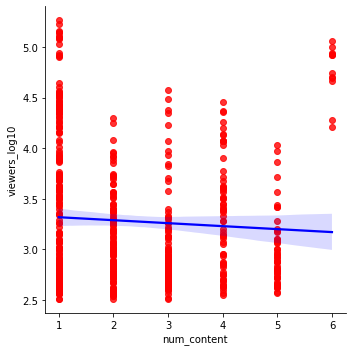

In [33]:
sns.lmplot (
    x = 'num_content',
    y = 'viewers_log10',
    data = before,
    fit_reg = True,
    scatter_kws = {'color' : 'red'},
    line_kws = {'color' : 'blue'}
)

In [34]:
outcome, predictors = patsy.dmatrices('viewers_log10 ~ num_content', before)

mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:          viewers_log10   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.273
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.132
Time:                        16:44:13   Log-Likelihood:                -559.87
No. Observations:                 563   AIC:                             1124.
Df Residuals:                     561   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3483      0.054     61.532      

## After COVID

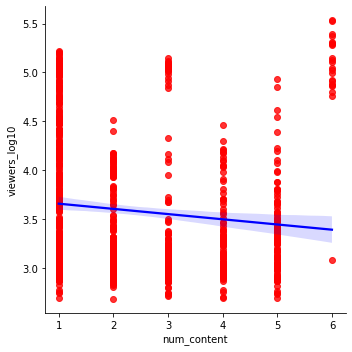

In [35]:
sns.lmplot (
    x = 'num_content',
    y = 'viewers_log10',
    data = after,
    fit_reg = True,
    scatter_kws = {'color' : 'red'},
    line_kws = {'color' : 'blue'}
)

In [36]:
outcome, predictors = patsy.dmatrices('viewers_log10 ~ num_content', after)

mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:          viewers_log10   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     12.55
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000417
Time:                        16:44:13   Log-Likelihood:                -879.95
No. Observations:                 862   AIC:                             1764.
Df Residuals:                     860   BIC:                             1773.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7100      0.044     83.972      

An interesting relationship we see here is that before and after COVID both have negative coefficients, and thus negative relationships, but in the case of after COVID times, there is a stronger correlation between num_contents and viewership. The takeaway is that the negative relationship holds before and after COVID's start, but the strength of the correlation does numerically increase in the case of after COVID.

# 4: Line Plots - Observing Trends Over Time

The lineplots we generate contain both lines (representing each level of "num_content") and their respective confidence intervals. While the lineplot for the overall viewership from January 2019 to September 2021 is simple enough to read, the lineplot for the viewership according to "num_content" is difficult to understand. So, for the purpose of readability, we also decided to generate the 2nd lineplot without the confidence interval. Moreover, we generated lineplots for each level of "num_content" (and their respective confidence intervals).

<AxesSubplot:xlabel='month-year', ylabel='viewers_log10'>

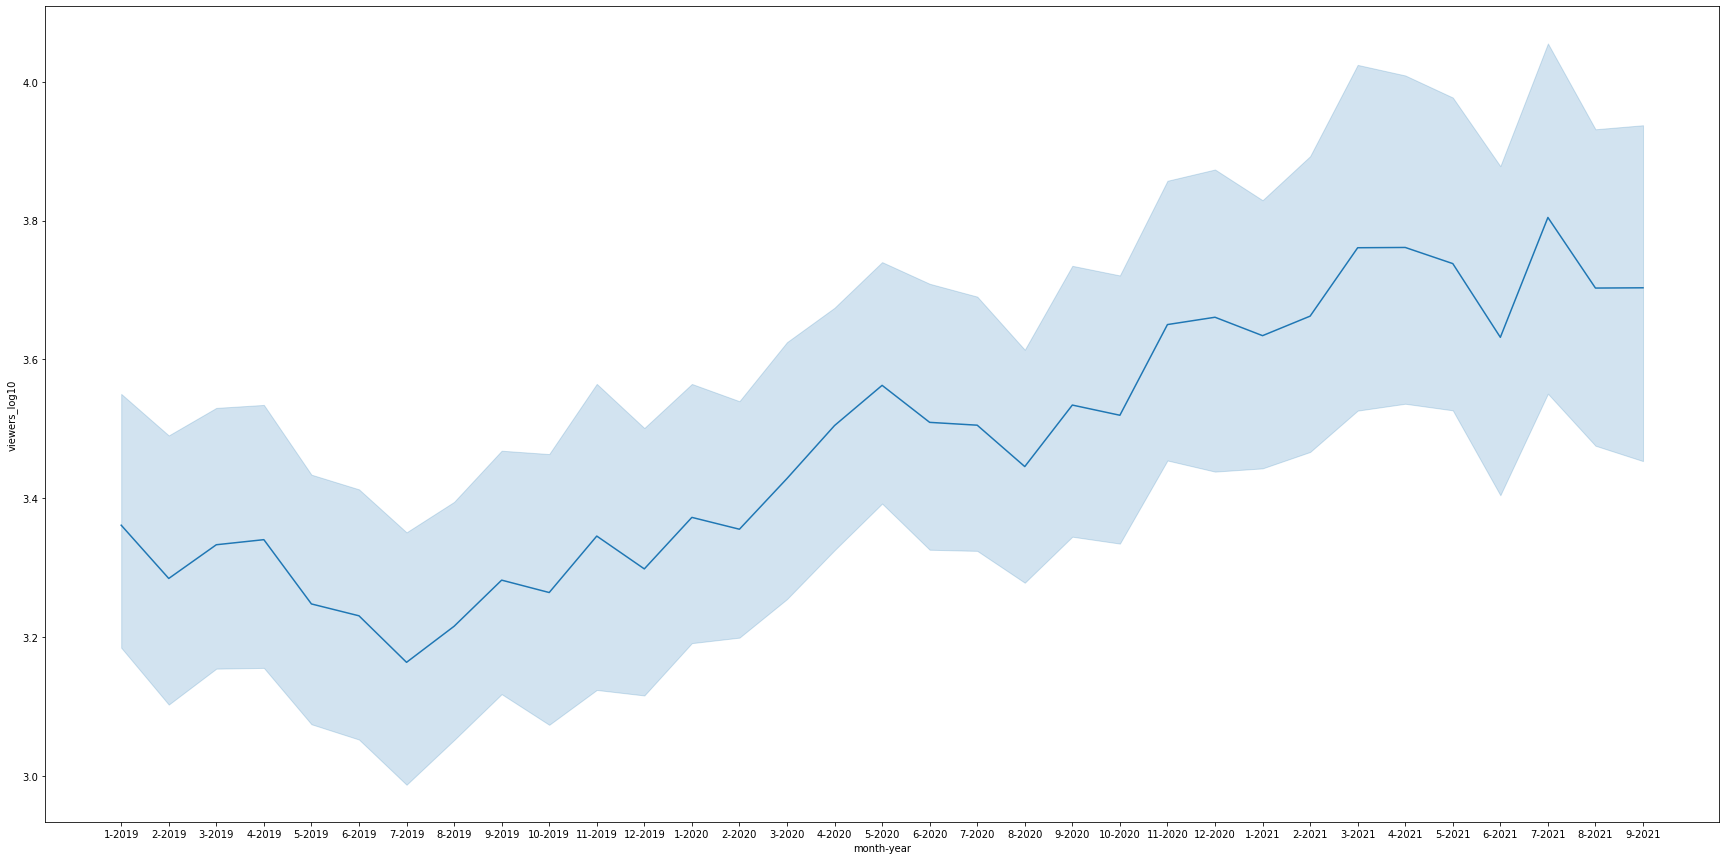

In [37]:
# lineplot for overall Twitch (average) viewership from January 2019 to September 2021 
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = bigData
)

As we anticipated, Twitch viewership before the COVID-19 pandemic (the onset of which occurred on 3-2020) is far lower than during such. With more people, indoors, there we expected that more people would be on Twitch to view other playing video games. By dividing this line according to num_content, how does this trend hold up?

<AxesSubplot:xlabel='month-year', ylabel='viewers_log10'>

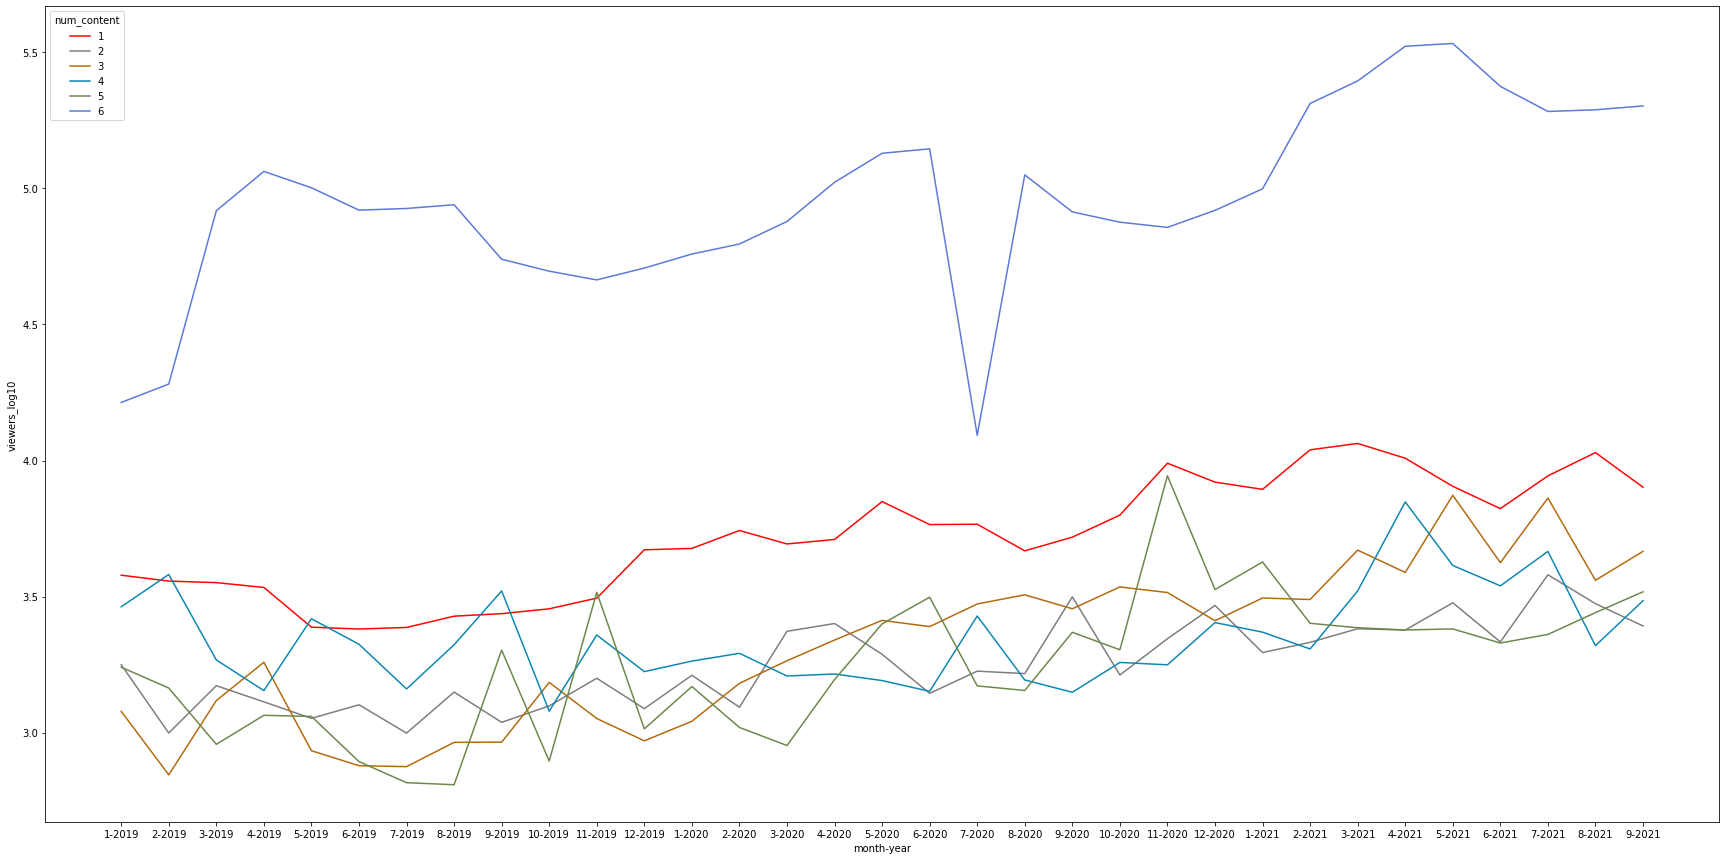

In [38]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    hue = 'num_content',
    data = bigData,
    # the color of the data is done in order (num_content = 1, num_content = 2, etc)
    palette = ['#ff0502','#7d7d7d','#b36a0c','#0c87b3','#6d874a','#5c78d8'],
    ci = None
)

We see that overall, the trend of more viewers coming to Twitch during the COVID-19 pandemic holds true for all levels of num_content. True to our linear regression test, we see that the most popular games over time have num_content = 1 (we must note that we do not count num_content = 6 as we have identified such to largely be outliers). However, for 1 < num_content < 6, we notice that the inverse relationship of the linear regression test does not necessarily hold up. For example, during the COVID-19 pandemic (3-2021 onwards), we would anticipate that following num_content = 1, games with num_content = 2 would be the next most popular on Twitch. However, we find that throughout the COVID-19 pandemic games that have a num_content with values 2, 3 and 5 shift in terms of being the 2nd most popular.

(Below we run lineplots for each level of num_content to further solidify that overall, viewership increases going from 2019 to 2021 in which the COVID-19 pandemic runs from 3-2020 onwards.)

In [39]:
# these are subsets of bigData based on num_content
num_level1 = bigData[bigData['num_content'] == 1]
num_level2 = bigData[bigData['num_content'] == 2]
num_level3 = bigData[bigData['num_content'] == 3]
num_level4 = bigData[bigData['num_content'] == 4]
num_level5 = bigData[bigData['num_content'] == 5]
num_level6 = bigData[bigData['num_content'] == 6]

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 1')]

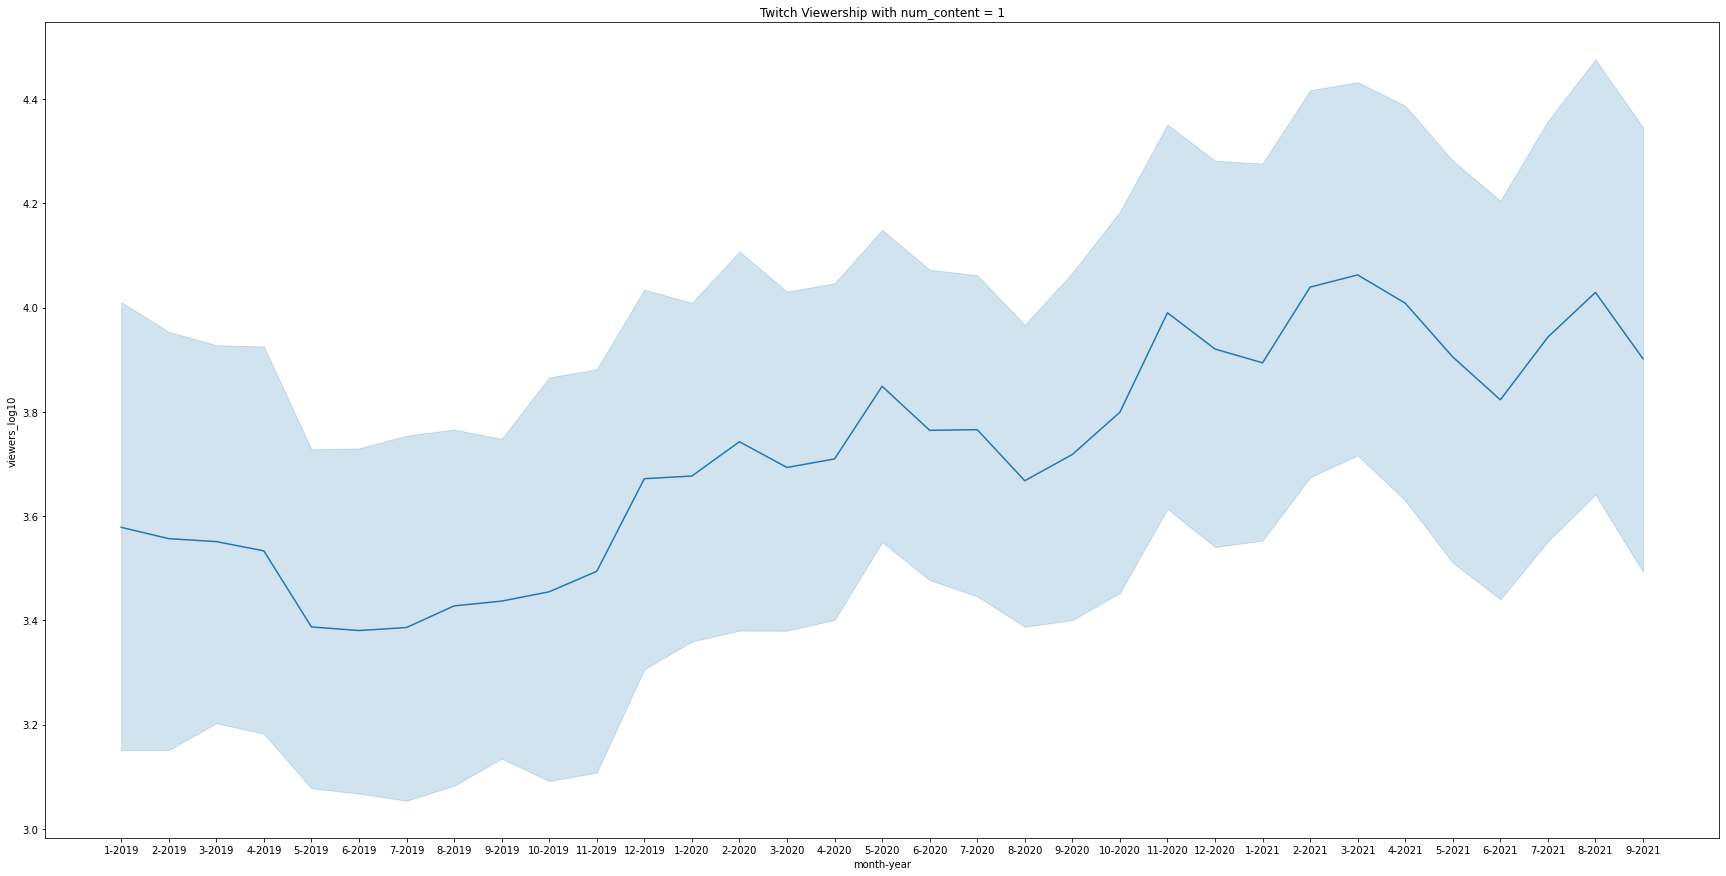

In [40]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level1
).set(title='Twitch Viewership with num_content = 1')

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 2')]

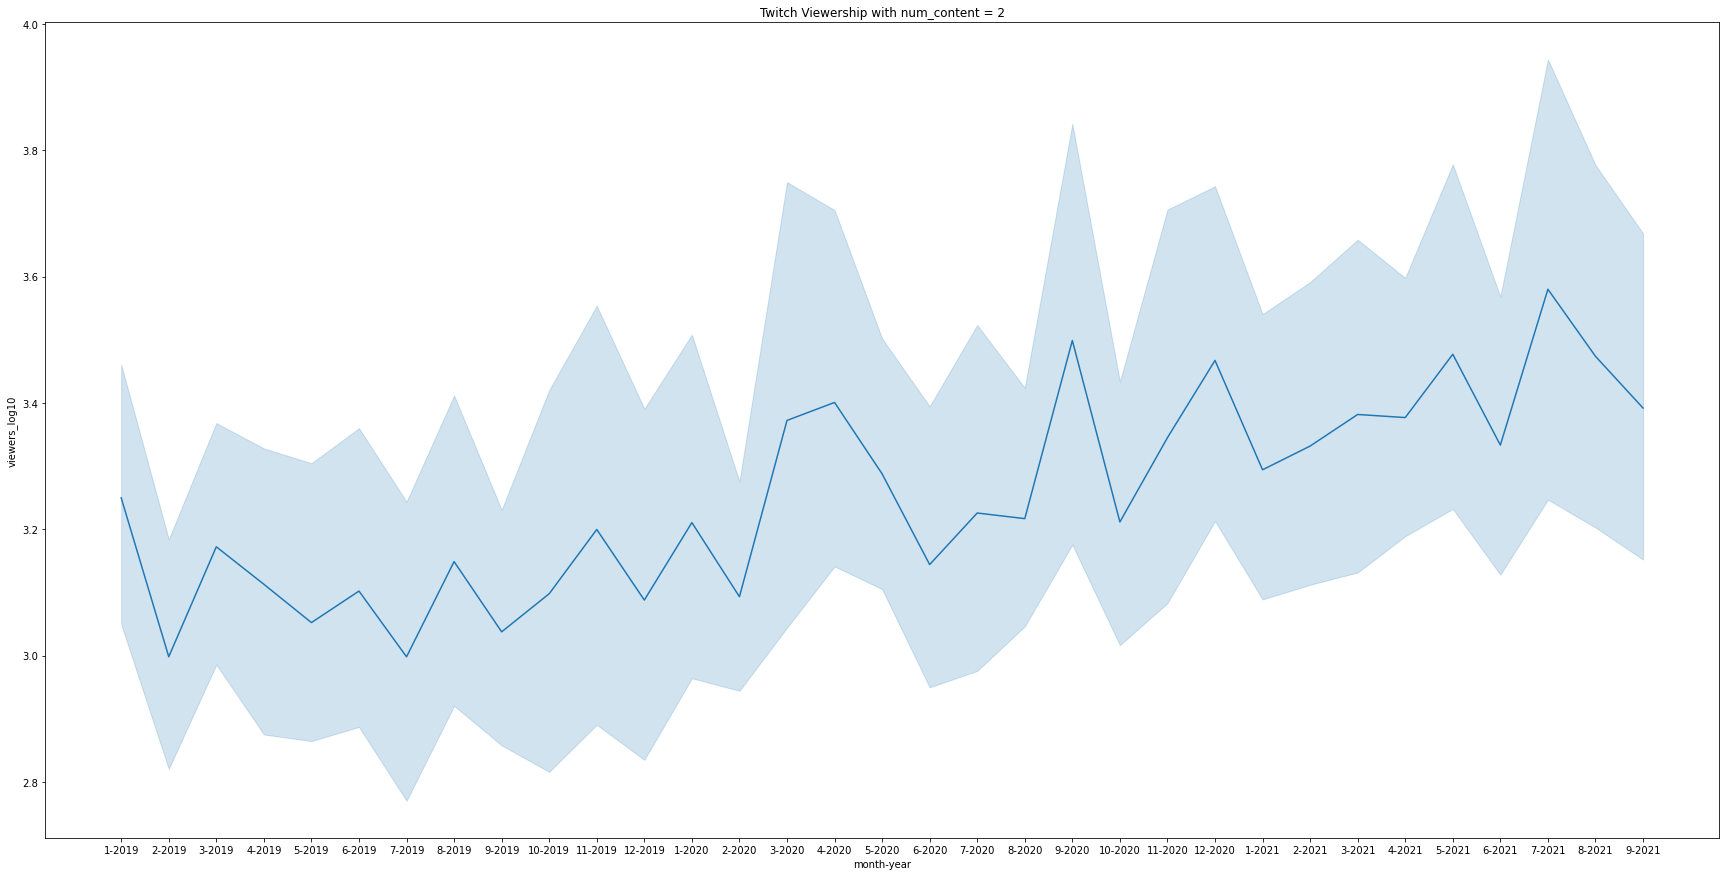

In [41]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level2
).set(title='Twitch Viewership with num_content = 2')

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 3')]

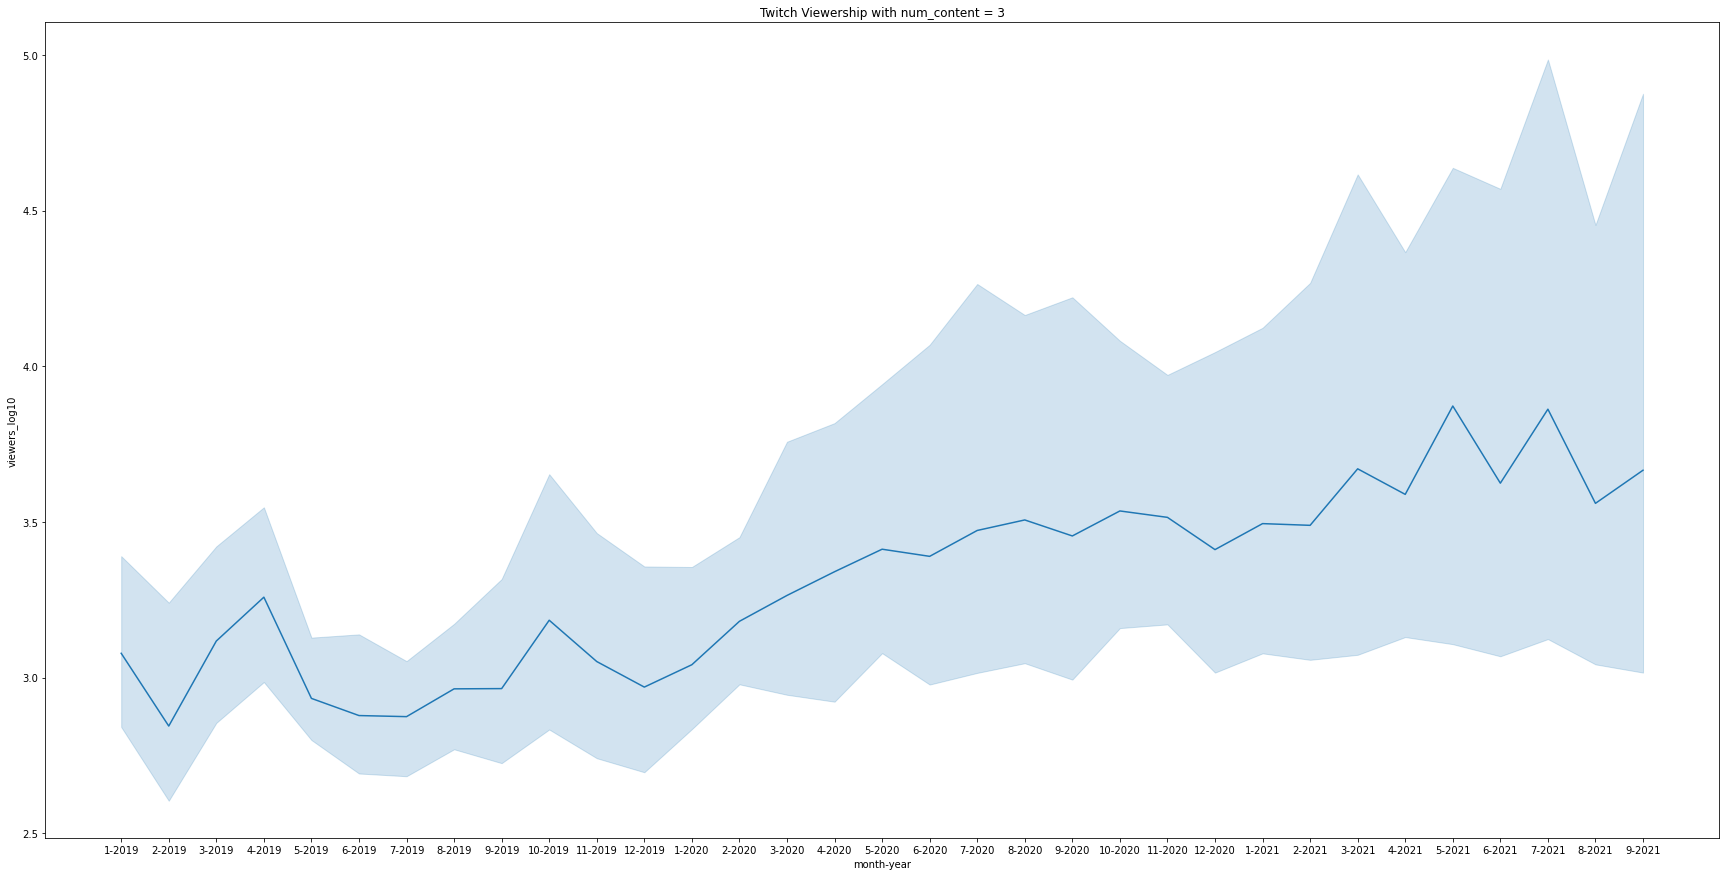

In [42]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level3
).set(title='Twitch Viewership with num_content = 3')

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 4')]

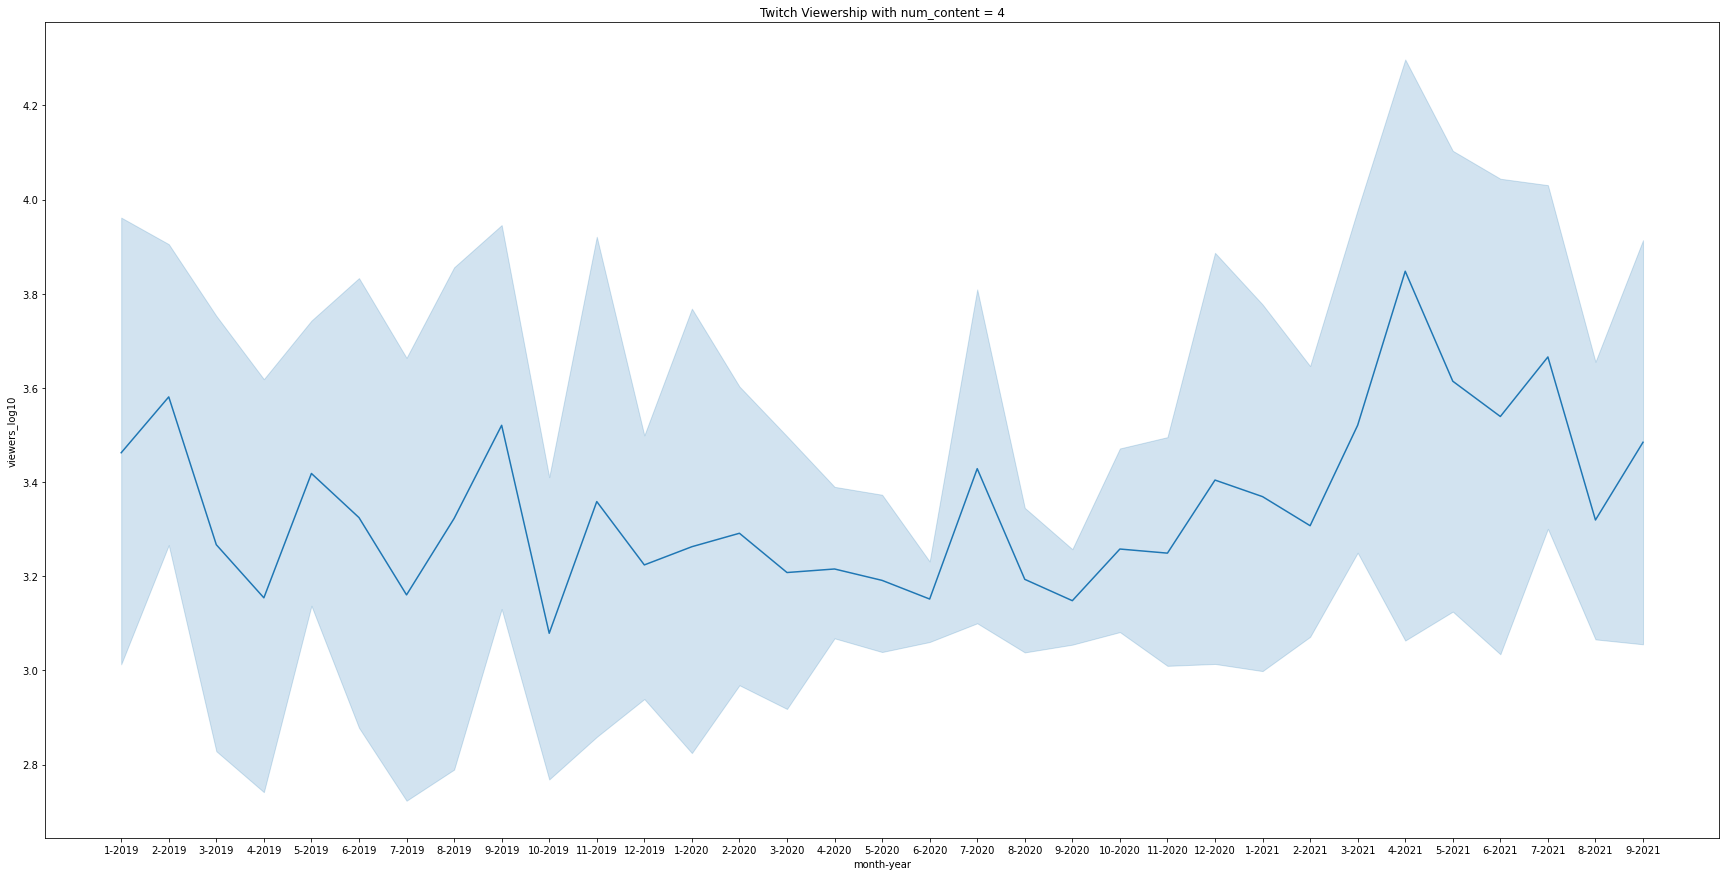

In [43]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level4
).set(title='Twitch Viewership with num_content = 4')

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 5')]

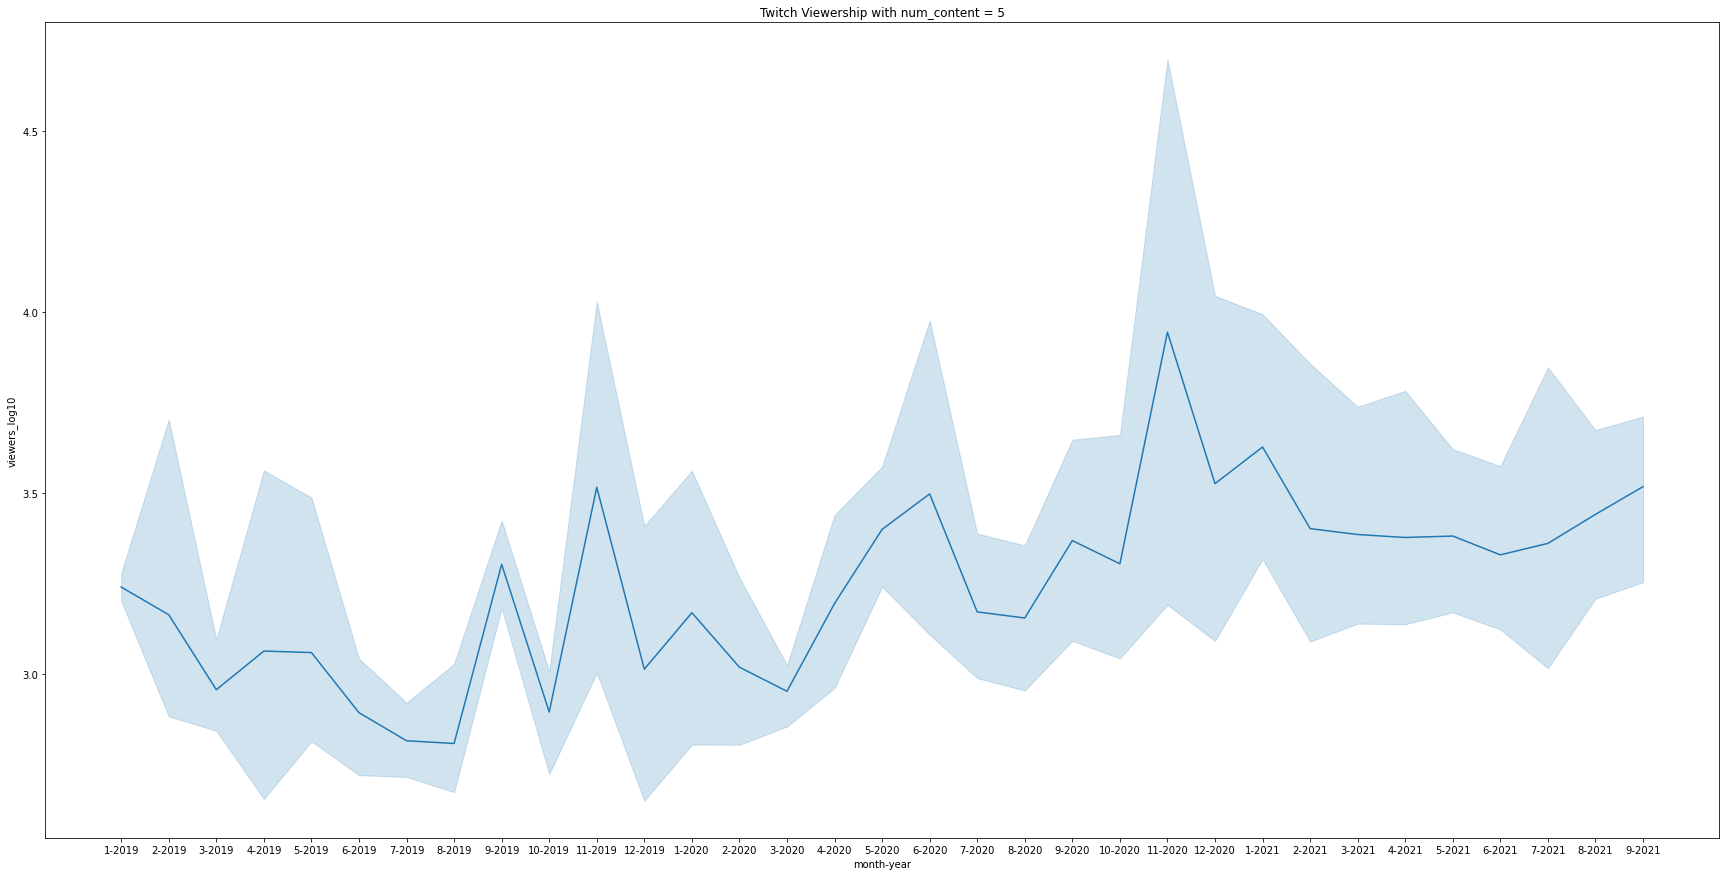

In [44]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level5
).set(title='Twitch Viewership with num_content = 5')

[Text(0.5, 1.0, 'Twitch Viewership with num_content = 6')]

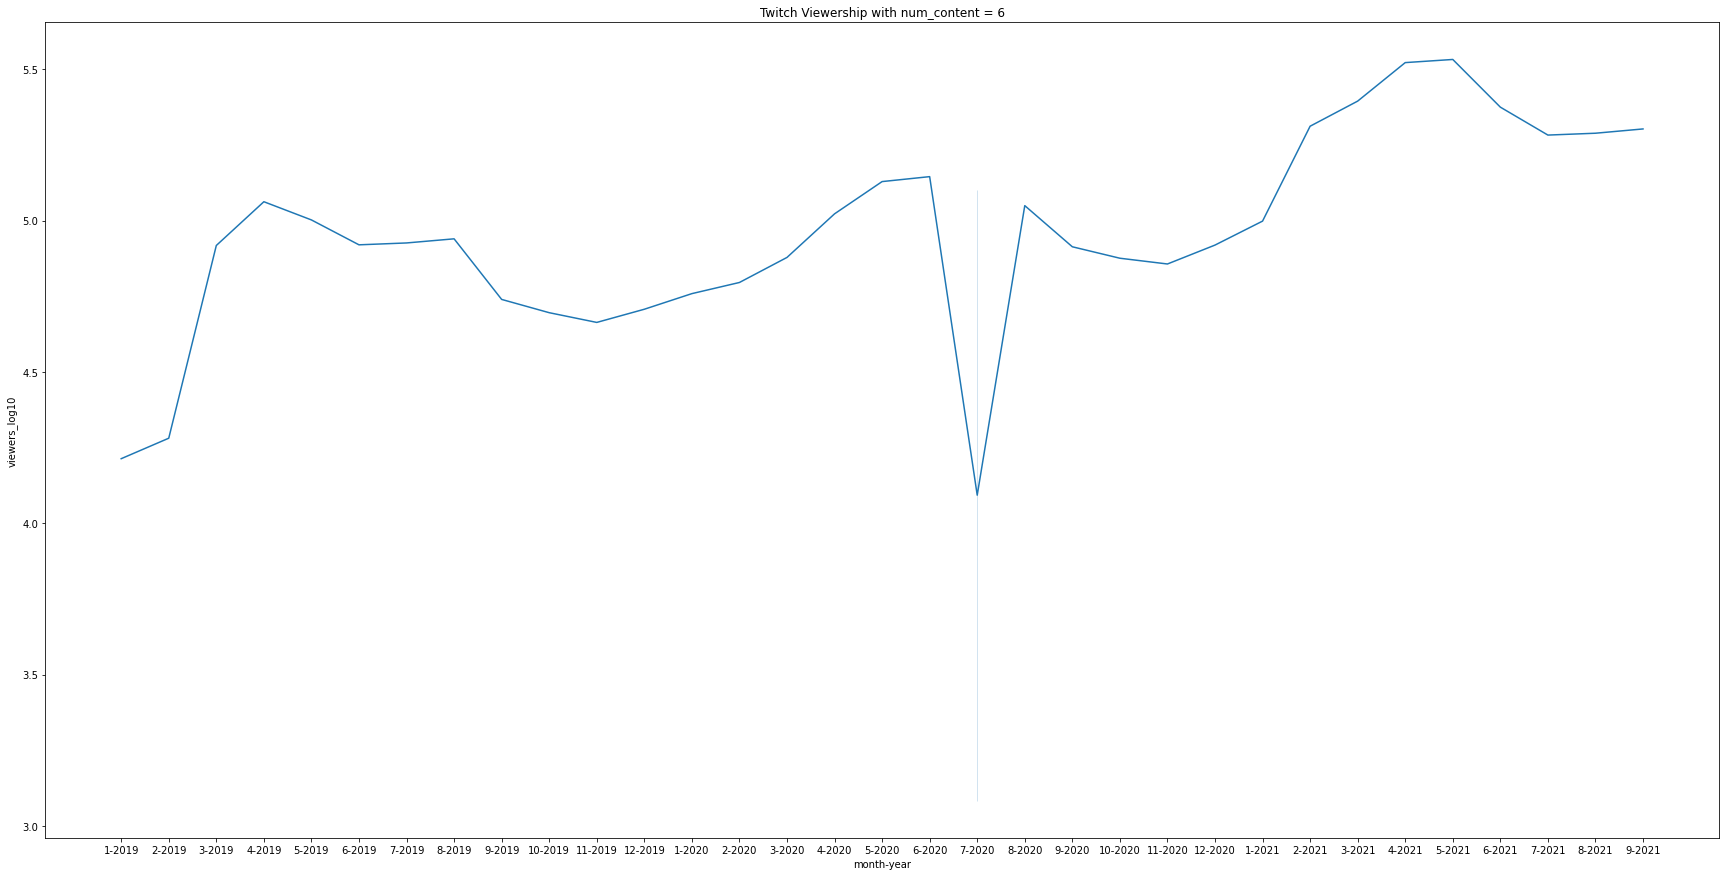

In [45]:
sns.lineplot(
    x = 'month-year',
    y = 'viewers_log10',
    data = num_level6
).set(title='Twitch Viewership with num_content = 6')

As you can see, each graph of viewership for the respective brackets of num_content do show a trend of increasing over time. Another interesting trend is that for num_content == 2 or 3, the rate of increase in viewership does tend to increase around the March 2020 time, our definiton for the beginning of lockdown and COVID regulations. Our thought idea is that games with 2 or 3 content are usually rated lower (E as opposed to M) and therefore fit a younger viewer audience, which would follow intuition that more kids forced indoors will lead them to spend more time playing/watching games and consuming content for those games. 

# Ethics & Privacy

<p>Clearly, there will be limitations to what we are able to accomplish with this project. Among the most obvious limitations is the generalizability of our datasets. While we currently have a Twitch dataset, it is unclear whether it is representative of mostly older (or younger) viewers, males and/or females, etc. Moreover, the streams (or broadcasts produced by streamers) are only representative of streamers with 3 or more viewers. The dataset bias for this project is also important as it mostly pertains to users with sufficient internet access and computer systems. Since we are analyzing the top games of Twitch, we can only address the bias beforehand that the databases may only reflect popularity of games for neighborhoods who can handle the internet connection. Additionally, we are unsure if these users are mostly present within the US, Europe, Brazil, etc. </p>
    
<p>We also must consider the consequences of our project. As the outcome of this project is to determine whether content dictated by a content moderation system predicts a video game’s popularity on a major online platform, the implications for video game developers and streamers is immense. If our hypothesis holds, the amount of games made for a certain age group and how much of these games are streamed can shift accordingly. As we are not yet sure if our hypothesis holds, this is not currently a point of concern, but is certainly something to monitor in the near future. </p>
    
<p>However, this lack of generalizability also works in our favor in one way: privacy. In terms of privacy concerns, we do not collect any identifiable user information given that we are analyzing publicly available datasets. As such, we won’t be worrying about whether our data and analyses are gonna compromise people’s personal information. Still, that does not change how generalizability, bias, and consequences are going to be the most important considerations.</p>


# Conclusion & Discussion

<p> We predicted that the Twitch viewership and popularity of video games would have a positive correlation with  number of ESRB regulation factors, binary values determining the appearances of blood, violence, sexual contents, and etc to provide ratings of video games. We also hypothesized that after the COVID-19 pandemic and quarantine, marked by and including January 2020, the Twitch viewership would increase in a direct relationship with the number of ESRB factors.
 <p>However, we viewed that the number of contents in video games has an inverse relationship with the Twitch viewerships and popularity in both 2019 and 2020, and our effective size ranging from -0.065 to -0.017, we reject the null hypothesis, and accept the alternative hypothesis. </p>
	<p>While we did see that the overall Twitcher viewership amount increased by a large amount since the start of COVID-19 pandemic, we did not find a positive correlation between increase in Twitch viewership and the ESRB contents.<p>
	<p>Our process of analyzing held some limitations. Our num_content contained different numbers of games in the columns, providing higher numbers of datasets for specific ESRB counts rather than equal distribution of data for all columns (num_content). This provided less opportunity for precision among our datasets and its specific columns and less opportunity for accuracy with columns that had smaller numbers of video games than other columns, such as num_content = 6 which had the least number of video games. </p>


# Team Contributions

1. Question, Background, Hypothesis<br>
    - Jan
    - Gabe (Background)

2. Data description<br>
    - Hwi
3. Data cleaning/processing<br>
    - Sean
    - Gabe
4. Data visualization<br>
    - Ramy 
    - Sean
5. Data Analysis<br>
    - Ramy
    - Sean 
6. Data results<br>
    - Ramy 
    - Sean
7. Ethics and privacy<br>
    - Jan
    - Gabe
8. Conclusion and discussion<br>
    - Jan
    - Hwi
9. Video<br>
    - Everyone
